In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Part 1: Harmonic oscillator
$
\frac{d^2s}{dt^2} = -Ps(t) 
$

__Background Info__  
Hooke's law  
$$ F = -kx $$  
- k := spring constant  
- x := spring displacement  
 
Variables   
- distance/position (d)  
- velocity/speed (d'- First derivative as a function of time)  
- acceleration (d''- Second derivative as a function of time)  

Analytically  
- amplitude: maximum magnitude of displacement  
- period: time required for an entire cycle 

Reference Material
- [Simple harmonic oscillators explained](https://www.khanacademy.org/science/physics/mechanical-waves-and-sound)

Questions
- What is "time step" though?

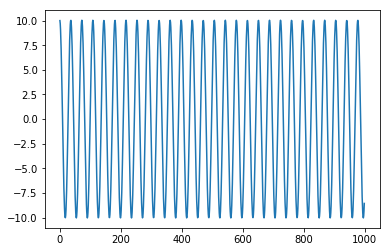

In [18]:
class SimpleHarmonicOscillator():
    def __init__(self, spring_constant, init_displacement, time_step):
        self.SPRING_CONSTANT = spring_constant
        self.INIT_DISPLACEMENT = init_displacement
        self.TIME_STEP = time_step
    
    def hookes_law(self, displacement):
        return (-1 * self.SPRING_CONSTANT * displacement)
    
    def manual_integration(self, old_val, delta):
        return (delta * self.TIME_STEP) + old_val
    
    def simulate_oscillation(self, epochs):
        self.displacement_record = [self.INIT_DISPLACEMENT]
        self.velocity_record = [0]
        self.acceleration_record = []
        self.time_record = [0]
        
        for i in range(1, epochs):
            new_acceleration = self.hookes_law(
                self.displacement_record[-1]
            )
            self.acceleration_record.append(new_acceleration)

            new_velocity = self.manual_integration(
                self.velocity_record[-1], 
                self.acceleration_record[-1]
            )
            self.velocity_record.append(new_velocity)

            new_displacement = self.manual_integration(
                self.displacement_record[-1],
                self.velocity_record[-1]
            )
            self.displacement_record.append(new_displacement)
            self.time_record.append(i)
    
    def plot(self):
        plt.plot(self.time_record, self.displacement_record)
        
if __name__ == "__main__":
    oscillator = SimpleHarmonicOscillator(3, 10, 0.1)
    oscillator.simulate_oscillation(1000)
    oscillator.plot()
   

### Part 2: Damped oscillator
$
\frac{d^2 s}{dt^2} = -P~s(t) - k~v(t)
$

__Background Info__  
Reference: [Over and underdamping coefficients](https://en.wikipedia.org/wiki/Harmonic_oscillator#Damped_harmonic_oscillator)

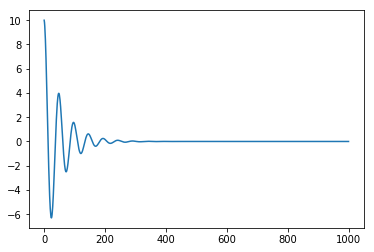

In [19]:
class DampedHarmonicOscillator(SimpleHarmonicOscillator):
    def __init__(self, spring_constant, init_displacement, time_step,
                damping_coefficient):
        super().__init__(spring_constant, init_displacement, time_step)
        self.DAMPING_COEFFICIENT = damping_coefficient

    def hookes_law(self, displacement, velocity):
        return ((-1 * self.SPRING_CONSTANT * displacement) - 
                (self.DAMPING_COEFFICIENT * velocity))

    def simulate_oscillation(self, epochs):
        self.displacement_record = [self.INIT_DISPLACEMENT]
        self.velocity_record = [0]
        self.acceleration_record = []
        self.time_record = [0]

        for i in range(1, epochs):
            new_acceleration = self.hookes_law(
                self.displacement_record[-1],
                self.velocity_record[-1]
            )
            self.acceleration_record.append(new_acceleration)

            new_velocity = self.manual_integration(
                self.velocity_record[-1], 
                self.acceleration_record[-1]
            )
            self.velocity_record.append(new_velocity)

            new_displacement = self.manual_integration(
                self.displacement_record[-1],
                self.velocity_record[-1]
            )
            self.displacement_record.append(new_displacement)
            self.time_record.append(i)


if __name__ == "__main__":
    oscillator = DampedHarmonicOscillator(3, 10, 0.075, 0.5)
    oscillator.simulate_oscillation(1000)
    oscillator.plot()